# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('db.csv')

# Trocando infinitos por NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

#df.dropna()

df


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
bins = [0, 3, 5, 7, 10]
labels = ['Asfixia Grave', 'Asfixia Moderada', 'Asfixia Leve', 'Normal']

df['APGAR5_categoria'] = pd.cut(df['APGAR5'], bins=bins, labels=labels, right=False)

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [3]:
df_filtrado = df.dropna(subset=['APGAR5', 'GESTACAO', 'SEXO'])

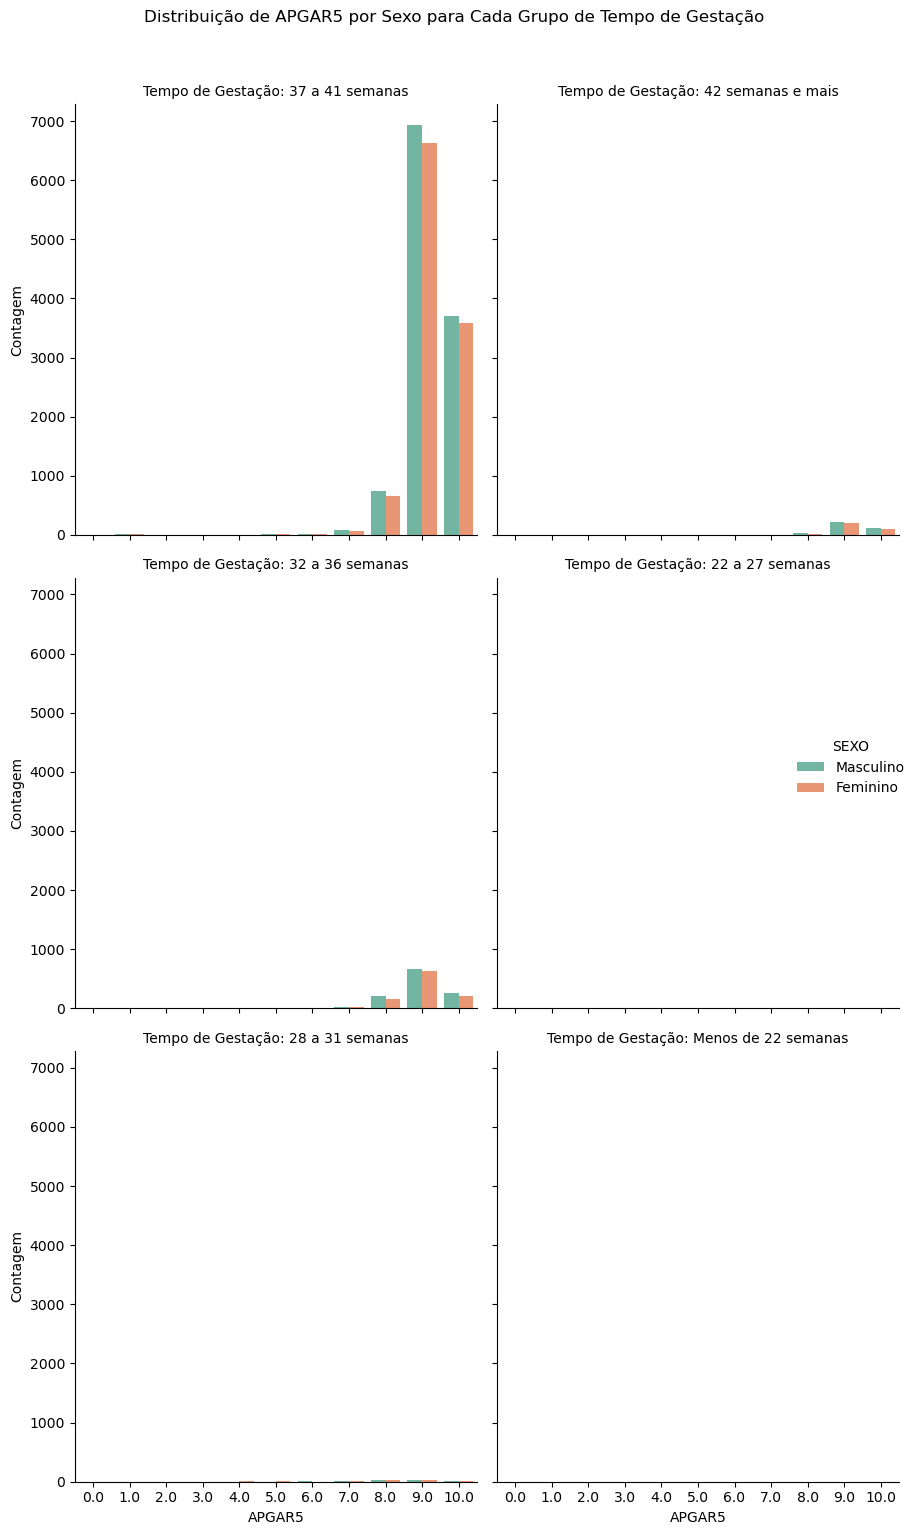

In [4]:
g = sns.catplot(
    x='APGAR5', 
    hue='SEXO', 
    col='GESTACAO', 
    data=df_filtrado, 
    kind='count',
    aspect=0.8,
    palette='Set2',
    col_wrap=2
)

# Ajustar títulos e rótulos
g.set_axis_labels('APGAR5', 'Contagem')
g.set_titles('Tempo de Gestação: {col_name}')
g.fig.suptitle('Distribuição de APGAR5 por Sexo para Cada Grupo de Tempo de Gestação', y=1.02)

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
tabela_cruzada = pd.crosstab(df_filtrado['APGAR5'], df_filtrado['GESTACAO'])
tabela_cruzada

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,7,0,2,5,1,1
1.0,0,0,2,20,0,0
2.0,8,2,1,3,0,1
3.0,6,1,2,5,0,0
4.0,1,5,8,7,0,0
5.0,0,7,11,21,1,0
6.0,2,7,17,44,1,0
7.0,10,11,56,151,5,1
8.0,24,61,362,1417,44,0


####  5) Da tabela cruzada do item anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

<Axes: xlabel='GESTACAO', ylabel='APGAR5'>

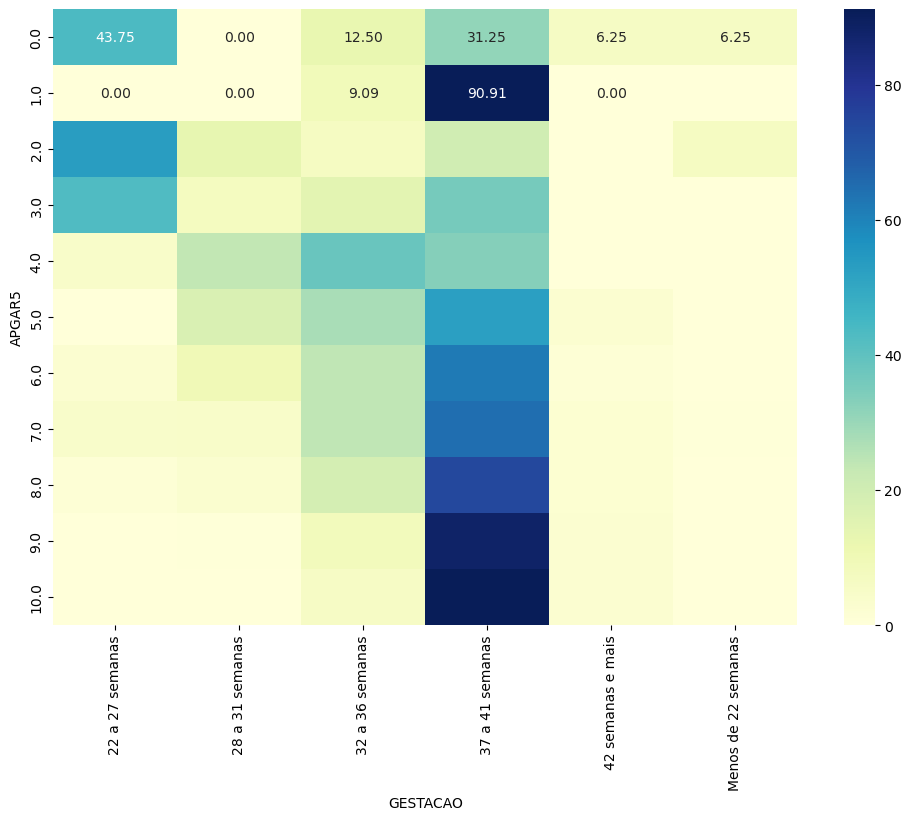

In [6]:
percentuais_linha = (tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100)

plt.figure(figsize=(12, 8))
sns.heatmap(percentuais_linha, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

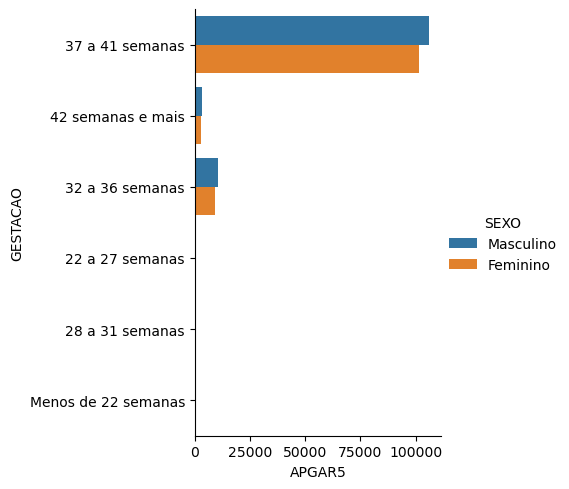

In [14]:
sns.catplot(x='APGAR5', y='GESTACAO'
            , hue = 'SEXO'
            , kind='bar'
            , estimator = sum
            , data=df_filtrado
            , errorbar = None
           )

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

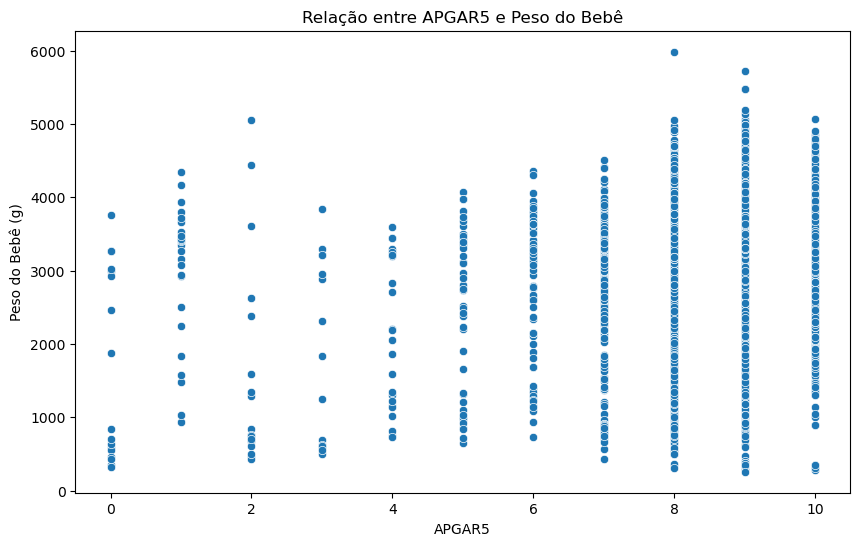

Correlação entre APGAR5 e Peso do Bebê: 0.17


In [16]:
# Filtrar linhas onde 'APGAR5' ou 'PESO' são NaN
df_filtrado = df.dropna(subset=['APGAR5', 'PESO'])

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='APGAR5', y='PESO', data=df_filtrado)
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (g)')
plt.show()

# Calculando correlação entre APGAR5 e Peso
correlacao = df_filtrado['APGAR5'].corr(df_filtrado['PESO'])
print(f"Correlação entre APGAR5 e Peso do Bebê: {correlacao:.2f}")